In [1]:
import emcee
import matplotlib.pyplot as plt
import pyccl as ccl
import numpy as np
import corner
from IPython.display import display, Math
import seaborn as sns
import matplotlib.colors as mcolors

print(emcee.__version__)

3.1.6


In [136]:
# Define cosmology

cosmo_universe = ccl.Cosmology(Omega_c = 0.269619, 
                          Omega_b = 0.050041,
                          h = 0.6688,
                          n_s = 0.9626,
                          A_s = 2.092e-9)

Bias_distribution_fiducial = np.array([1.562362,
                             1.732963,
                             1.913252,
                             2.100644,
                             2.293210])


In [375]:
labels = [r"$\Omega_c$", r"$\mu_0$",r"$\Sigma_0$", r"$10^{9}A_s$", r"$h$", r"$n_s$", r"$\omega_b$",\
         r'$b_1$', r'$b_2$', r'$b_3$', r'$b_4$', r'$b_5$']

value1 = [cosmo_universe["Omega_c"], 0.0,0.0, cosmo_universe["A_s"]*1e9, cosmo_universe["h"],\
          cosmo_universe["n_s"],cosmo_universe["Omega_b"]*cosmo_universe["h"]**2,\
         Bias_distribution_fiducial[0], Bias_distribution_fiducial[1],\
         Bias_distribution_fiducial[2],Bias_distribution_fiducial[3],\
         Bias_distribution_fiducial[4]]

lower_value1 = [0.28 - 0.06, -1.5, -1.5, 1.7, 0.61 , 0.92, 0.04, 0.8,0.8,0.8,0.8,0.8]
upper_value1 = [0.36 - 0.04, 1.5, 1.5, 2.5, 0.73,1 , 0.06, 3.0,3.0,3.0,3.0,3.0]



## GR, no fsigma8

In [453]:
# Read the HDF5 file (note: no need to reset the backend here)
#filename = "/home/c2042999/PCA_project/Parameter_inference_GR/mcmc/mcmc_GR_muSigma_PCACuts_nofsigma8.h5"
filename = "/scratch/c2042999/chains_final/mcmc_GR_muSigma_PCACuts_nofsigma8.h5"

while True:
    try:
        reader = emcee.backends.HDFBackend(filename, read_only=True)
        break  # Exit the loop once file is read successfully
    except BlockingIOError:
        # Wait for some time before retrying
        print("File is locked, retrying...")
        time.sleep(0.1)  # Sleep for 1 second before trying again

# Check how many steps have been completed so far
n_steps_completed = reader.iteration
print(f"Number of steps completed: {n_steps_completed}")

# You can also manually access the raw chain and other properties
raw_chain = reader.get_chain(discard=400, thin=20)#
print(f"Current raw chain shape: {raw_chain.shape}")

tau = reader.get_autocorr_time(tol=0)
max_tau_ratio = np.max(tau * 100 / reader.iteration)
converged = max_tau_ratio < 1
print("Current iteration: {}".format(reader.iteration))
print("Max 100 x Tau/N: {}".format(max_tau_ratio))


Number of steps completed: 15204
Current raw chain shape: (740, 76, 12)
Current iteration: 15204
Max 100 x Tau/N: 0.9956771999532225


In [454]:
# Get the raw chain and log-probabilities
raw_chain = reader.get_chain(flat=False)  # Unflattened chain: (steps, walkers, parameters)
log_prob = reader.get_log_prob(flat=False)  # Unflattened log-probabilities: (steps, walkers)

# Calculate burn-in index
n_burnin = 400

# Remove the burn-in
raw_chain_burnin_removed = raw_chain[n_burnin:]  # Keep steps after burn-in
log_prob_burnin_removed = log_prob[n_burnin:]  # Keep log-probabilities after burn-in

# Flatten the chains after removing burn-in
raw_chain_flat = raw_chain_burnin_removed.reshape(-1, raw_chain.shape[-1])  # (samples, parameters)
log_prob_flat = log_prob_burnin_removed.reshape(-1)  # (samples,)

# Compute the mean of each parameter
mean_params = np.mean(raw_chain_flat, axis=0)

# Find the sample with the maximum log-probability
max_likelihood_index = np.argmax(log_prob_flat)
max_likelihood_params = raw_chain_flat[max_likelihood_index]

# Print the results
print("Mean parameter values (after burn-in):")
print(mean_params)

print("Maximum likelihood parameter values (after burn-in):")
print(max_likelihood_params)
print("Maximum likelihood: ", log_prob_flat[max_likelihood_index])


Mean parameter values (after burn-in):
[ 0.27018032 -0.03715947  0.00530465  2.08447977  0.66931957  0.96253239
  0.02238219  1.56933592  1.73930771  1.91880417  2.10522958  2.29770347]
Maximum likelihood parameter values (after burn-in):
[ 0.26987178  0.08615283 -0.0086923   2.06855114  0.66984065  0.96308457
  0.02242265  1.55514619  1.72934418  1.91102734  2.10375343  2.29778508]
Maximum likelihood:  12.07169187014296


In [455]:
# Assuming `raw_chain` is the MCMC chain you have loaded from the file.
#filename = "/home/c2042999/PCA_project/Parameter_inference_GR/mcmc/mcmc_GR_muSigma_StandardCuts_nofsigma8.h5"
filename = "/scratch/c2042999/chains_final/mcmc_GR_muSigma_StandardCuts_nofsigma8.h5"

while True:
    try:
        reader = emcee.backends.HDFBackend(filename, read_only=True)
        break  # Exit the loop once file is read successfully
    except BlockingIOError:
        # Wait for some time before retrying
        print("File is locked, retrying...")
        time.sleep(0.1)  # Sleep for 1 second before trying again

raw_chain_standardcuts = reader.get_chain(discard=500, thin=20)#

# Check how many steps have been completed so far
n_steps_completed = reader.iteration
print(f"Number of steps completed: {n_steps_completed}")

# You can also manually access the raw chain and other properties
print(f"Current raw chain shape: {raw_chain_standardcuts.shape}")


tau = reader.get_autocorr_time(tol=0)
max_tau_ratio = np.max(tau * 100 / reader.iteration)
converged = max_tau_ratio < 1
print("Current iteration: {}".format(reader.iteration))
print("Max 100 x Tau/N: {}".format(max_tau_ratio))


Number of steps completed: 56032
Current raw chain shape: (2776, 76, 12)
Current iteration: 56032
Max 100 x Tau/N: 0.9986647310711158


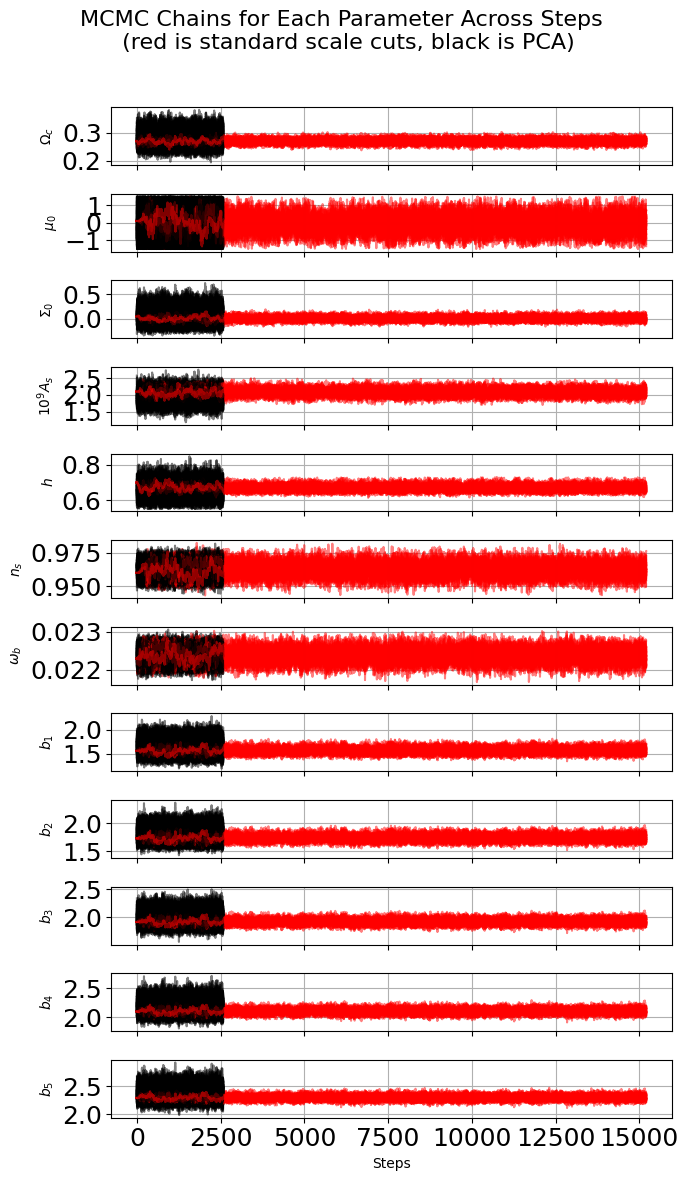

In [445]:
# Assuming `raw_chain` is the MCMC chain you have loaded from the file.
n_steps, n_walkers, n_params = raw_chain.shape

# Create a figure with subplots, one for each parameter
fig, axes = plt.subplots(n_params, figsize=(7, n_params), sharex=True)

# Iterate over each parameter and plot its evolution
for i in range(n_params):
    ax = axes[i]
    for j in range(40):
        ax.plot(raw_chain_standardcuts[:, j, i], alpha=0.5, color="k")  # Plot for each walker
        ax.plot(raw_chain[:, j, i], alpha=0.5, color="r")  # Plot for each walker
    #ax.plot(np.arange(len(raw_chain[:1000, 0, 0])), value1[i]*np.ones(len(raw_chain[:1000, 0, 0])), color="g")

    """
    ax.plot(np.arange(len(raw_chain_standardcuts[:, 0, 0])), value1[i]*np.ones(len(raw_chain_standardcuts[:, 0, 0])), color="g")
    ax.plot(np.arange(len(raw_chain_standardcuts[:, 0, 0])), lower_value1[i]*np.ones(len(raw_chain_standardcuts[:, 0, 0])), color="g", linestyle="--")
    ax.plot(np.arange(len(raw_chain_standardcuts[:, 0, 0])), upper_value1[i]*np.ones(len(raw_chain_standardcuts[:, 0, 0])), color="g", linestyle="--")
    """
    ax.set_ylabel(labels[i])
    ax.grid()

# Add a label for the shared x-axis (steps/iterations)
axes[-1].set_xlabel("Steps")

# Set the overall title and adjust layout
plt.suptitle("MCMC Chains for Each Parameter Across Steps \n (red is standard scale cuts, black is PCA)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
#plt.savefig("chains_ESS-C_noparametrization.pdf", bbox_inches='tight')
plt.show()

In [456]:
for i in range(12):
    mcmc = np.percentile(raw_chain[:, :, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [457]:
for i in range(12):
    mcmc = np.percentile(raw_chain_standardcuts[:, :, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [458]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.serif": ["CMU Serif", "DejaVu Serif"]
})
col = sns.color_palette("colorblind")

In [459]:
print(col[0])  # Should output something like (r, g, b) or (r, g, b, a)


(0.00392156862745098, 0.45098039215686275, 0.6980392156862745)


[0.269619, 0.0, 0.0, 2.0919999999999996, 0.6688]
[0.26987178190200606, 0.08615282868809804, -0.008692296422160213, 2.068551136632084, 0.6698406459545723]
(210976, 5)
(1155504, 5)


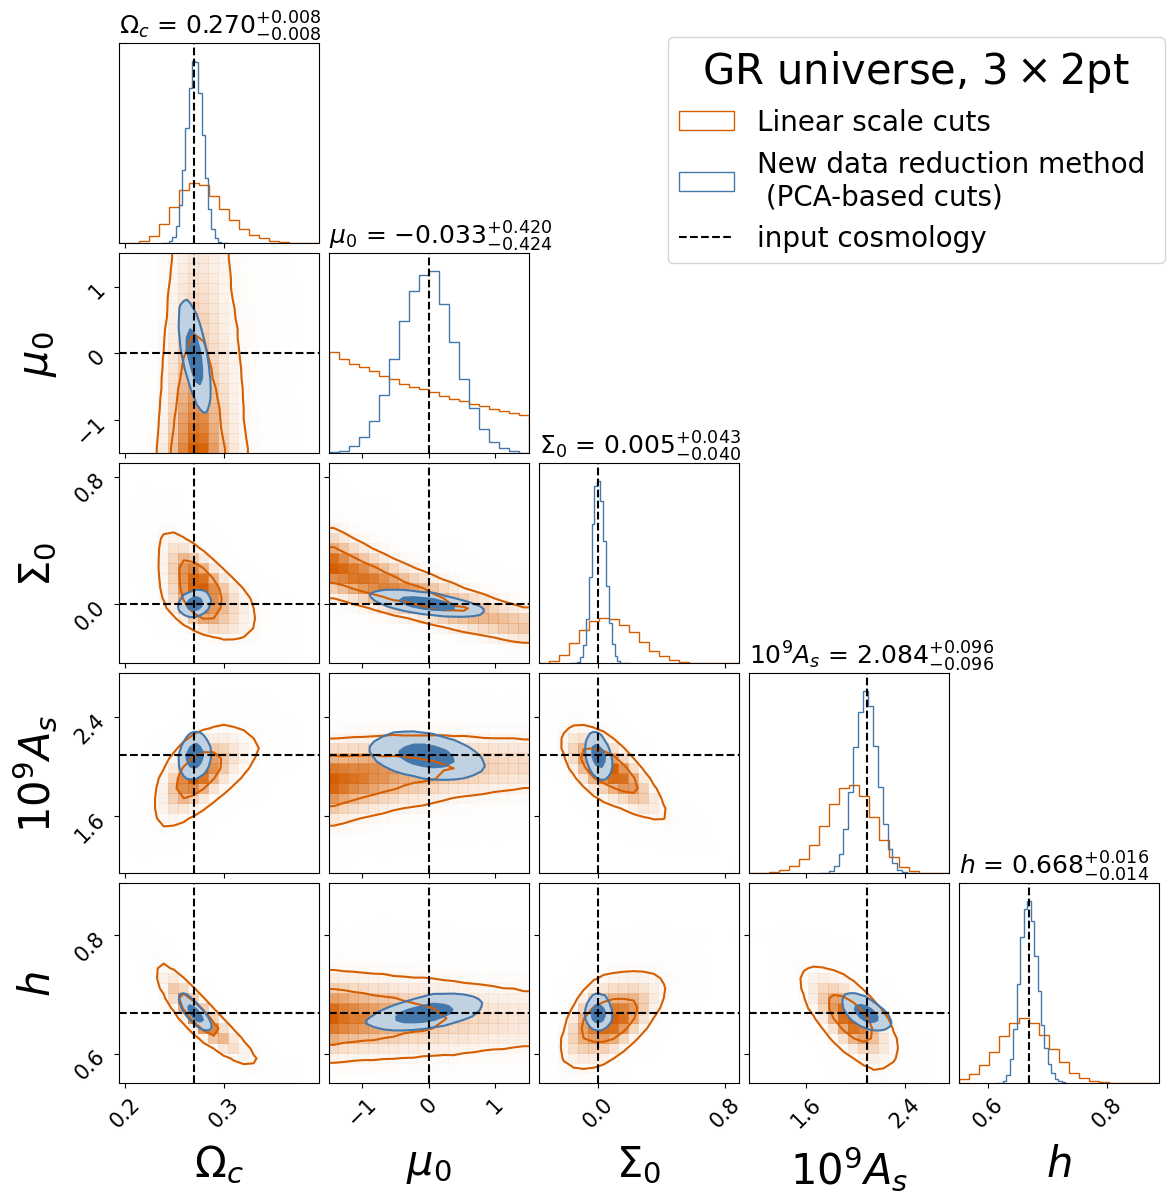

In [461]:
#### STANDARD CUTS #####
print(value1[:ndim])
print(list(max_likelihood_params)[:ndim])
ndim = 5#len(labels)
burned_chain = raw_chain_standardcuts

colors = ["#4477AA",mcolors.to_hex(col[3])]  # Contour colors
truth_color = "k"  # Truth values

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=False,
    smooth = 0.5,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=False,
    max_n_ticks=2,
    title_fmt=".3f"
)

flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

print(flat_samples.shape)
len_chain_standardcuts = flat_samples.shape[0]

figure = corner.corner(
    flat_samples, **CORNER_KWARGS, labels=labels, color = colors[1],hist_kwargs=dict(density=True)
);

### PCA CUTS####

burned_chain = raw_chain
flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=18, loc="left"),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".3f"
)

print(flat_samples.shape)

corner.corner(
    flat_samples, fig=figure, **CORNER_KWARGS, labels=labels, color=colors[0],hist_kwargs=dict(density=True)
);

######################
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    if value1[i] != None:
        ax = axes[i, i]
        ax.axvline(value1[i], color=truth_color, linestyle="--")

# Loop over histograms
for yi in range(ndim):
    for xi in range(yi):
        if value1[xi] == None:
            ax = axes[yi, xi]
            ax.axhline(value1[yi], color=truth_color, linestyle="--")
        elif value1[yi] == None:
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=truth_color, linestyle="--")
        else:
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=truth_color, linestyle="--")
            ax.axhline(value1[yi], color=truth_color, linestyle="--")
########################

for ax in figure.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)  # Change label size
    
#plt.legend(["3x2pt, Existing method (linear scale cuts)","maximum likelihood \n (for PCA-based cuts)","3x2pt, Our method (PCA-based cuts)","input cosmology"],\
#           bbox_to_anchor=(1.0, 12.7), fontsize=40,title=r"GR universe",title_fontsize=60)
plt.legend(["Linear scale cuts","New data reduction method \n (PCA-based cuts)","input cosmology"], bbox_to_anchor=(1.1, 5.3), fontsize=20,title=r"GR universe, $3\times2$pt",title_fontsize=30)
#"maximum likelihood \n (for PCA-based cuts)"
#plt.savefig("/home/c2042999/PCA_project/Figures/Final_figures/3x2pt_GR_marg.pdf", bbox_inches='tight')


[0.269619, 0.0, 0.0, 2.0919999999999996, 0.6688]
[0.26987178190200606, 0.08615282868809804, -0.008692296422160213, 2.068551136632084, 0.6698406459545723]
(210976, 12)
(1155504, 12)


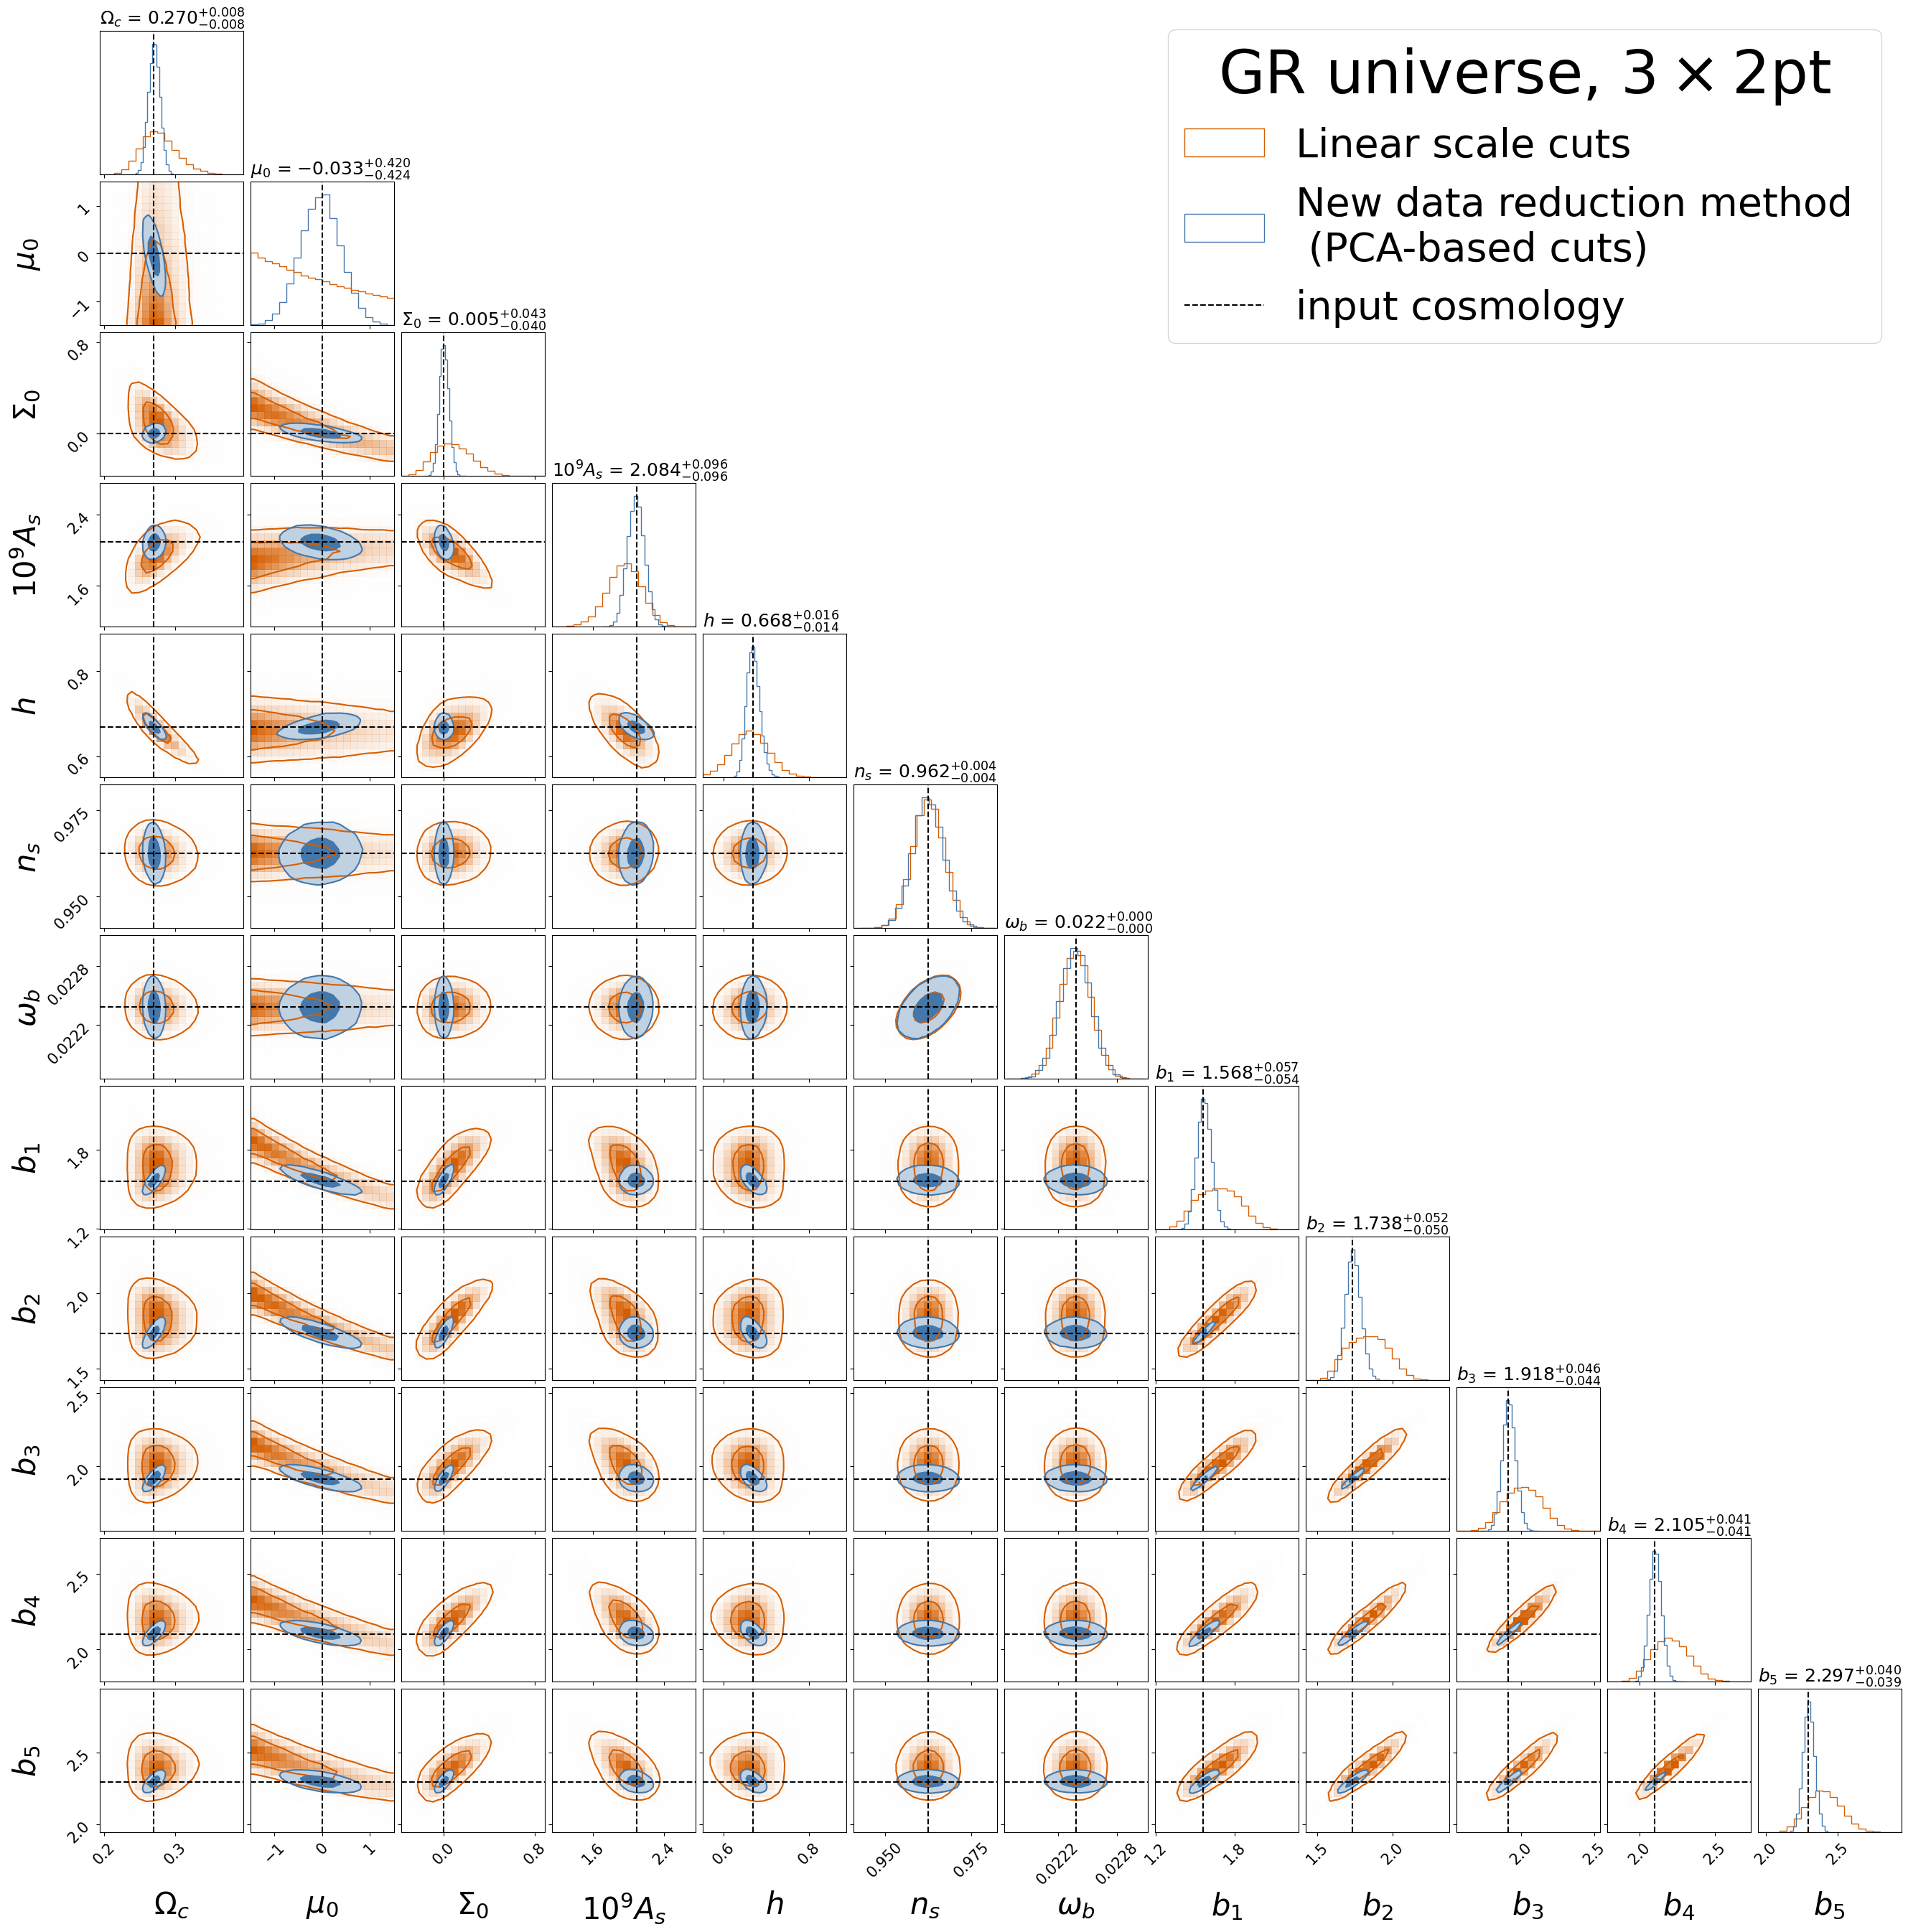

In [462]:
#### STANDARD CUTS #####
print(value1[:ndim])
print(list(max_likelihood_params)[:ndim])
ndim = len(labels)
burned_chain = raw_chain_standardcuts

colors = ["#4477AA",mcolors.to_hex(col[3])]  # Contour colors
truth_color = "k"  # Truth values

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=False,
    smooth = 0.5,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=False,
    max_n_ticks=2,
    title_fmt=".3f"
)

flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

print(flat_samples.shape)
len_chain_standardcuts = flat_samples.shape[0]

figure = corner.corner(
    flat_samples, **CORNER_KWARGS, labels=labels, color = colors[1],hist_kwargs=dict(density=True)
);

### PCA CUTS####

burned_chain = raw_chain
flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=18, loc="left"),
    show_titles=True,
    smooth = False,
    labelpad = 0.1,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".3f"
)

print(flat_samples.shape)

corner.corner(
    flat_samples, fig=figure, **CORNER_KWARGS, labels=labels, color=colors[0],hist_kwargs=dict(density=True)
);

######################
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    if value1[i] != None:
        ax = axes[i, i]
        ax.axvline(value1[i], color=truth_color, linestyle="--")

# Loop over histograms
for yi in range(ndim):
    for xi in range(yi):
        if value1[xi] == None:
            ax = axes[yi, xi]
            ax.axhline(value1[yi], color=truth_color, linestyle="--")
        elif value1[yi] == None:
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=truth_color, linestyle="--")
        else:
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=truth_color, linestyle="--")
            ax.axhline(value1[yi], color=truth_color, linestyle="--")
########################

for ax in figure.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)  # Change label size
    
plt.legend(["Linear scale cuts","New data reduction method \n (PCA-based cuts)","input cosmology"],\
           bbox_to_anchor=(1.0, 12.7), fontsize=40,title=r"GR universe, $3\times2$pt",title_fontsize=60)
#plt.legend(["Existing method (linear scale cuts)","Our method (PCA-based cuts)","input cosmology"], bbox_to_anchor=(1.1, 5.3), fontsize=20,title=r"GR universe",title_fontsize=30)
#"maximum likelihood \n (for PCA-based cuts)"
#plt.savefig("/home/c2042999/PCA_project/Figures/Final_figures/3x2pt_GR.pdf", bbox_inches='tight')


(163780, 2)
(1155504, 2)


"\nfor i in range(len(axes)):\n    for j in range(len(axes)):\n        ax = axes[i, j]\n        # Set the frame (spines) color to white\n        for spine in ax.spines.values():\n            spine.set_edgecolor('white')\n        \n        # Set tick parameters to make ticks white\n        ax.tick_params(axis='both', which='both', color='white', labelcolor='white')\n"

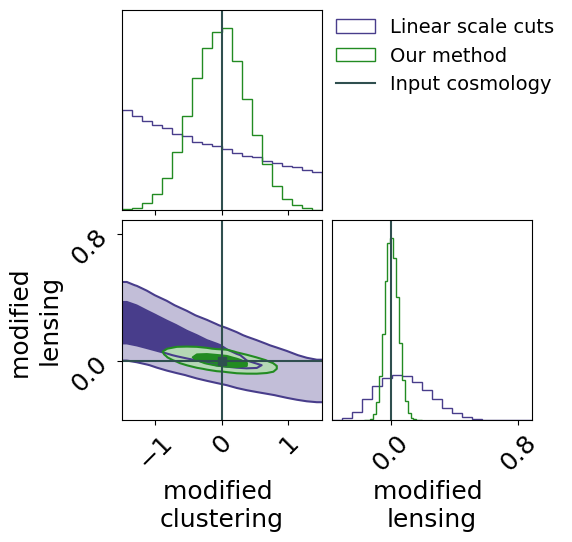

In [307]:
#### STANDARD CUTS #####

ndim = 2#len(labels)
burned_chain = raw_chain_standardcuts


CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=18),
    title_kwargs=dict(fontsize=14.5),
    show_titles=False,
    smooth = True,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f"
)

flat_samples =  burned_chain.reshape(-1, n_params)[:,1:3]

print(flat_samples.shape)
len_chain_standardcuts = flat_samples.shape[0]

figure = corner.corner(
    flat_samples, **CORNER_KWARGS, color = "darkslateblue",hist_kwargs=dict(density=True)
);

### PCA CUTS####

burned_chain = raw_chain
flat_samples =  burned_chain.reshape(-1, n_params)[:,1:3]

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=18),#, color="white"),
    title_kwargs=dict(fontsize=14.5),
    show_titles=False,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f",
    truths=[0,0],
    truth_color="darkslategray"
)

print(flat_samples.shape)

corner.corner(
    flat_samples, fig=figure, **CORNER_KWARGS, labels=["modified \n" + r"clustering","modified \n" + r"lensing"], color="forestgreen",hist_kwargs=dict(density=True)
);

######################
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))
"""
# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="g")
    #ax.axvline(mean_params[i], color="r")
    ax.axvline(max_likelihood_params[i], color="b")

ax.axvline(max_likelihood_params[ndim-1], color="b")


# Loop over histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="g")
        ax.axhline(value1[yi], color="g")
"""

"""
# Plot prior on mu/Sigma for numerical instability
mu_0_array_plot = np.linspace(-1,4,10)
axes[2, 1].fill_between(mu_0_array_plot,(mu_0_array_plot - 1)/2,   min((mu_0_array_plot - 1)/2), hatch="//", facecolor="g", alpha=.5)
#mu0 <= 2*Sigma0 + 1.0 
"""
#plt.legend(["Existing method (linear scale cuts)","maximum likelihood \n (for PCA-based cuts)","Our method (PCA-based cuts)","input cosmology"],\
#           bbox_to_anchor=(1.0, 12.7), fontsize=40,title=r"ESS universe",title_fontsize=60)
legend = plt.legend(["Linear scale cuts","Our method","Input cosmology"], bbox_to_anchor=(1.2, 2.1), fontsize=14)#, labelcolor='white', edgecolor='white')

legend.get_frame().set_alpha(0.0)

# Set the borders to a given color...
#plt.tick_params(color='white', labelcolor='white')
"""
for i in range(len(axes)):
    for j in range(len(axes)):
        ax = axes[i, j]
        # Set the frame (spines) color to white
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Set tick parameters to make ticks white
        ax.tick_params(axis='both', which='both', color='white', labelcolor='white')
"""
#plt.savefig("/home/c2042999/PCA_project/Figures/Paper_figures/Corner.png", format='png', dpi=600, bbox_inches='tight', transparent=True)


## GR, fsigma8

In [433]:
# Read the HDF5 file (note: no need to reset the backend here)
#filename = "/home/c2042999/PCA_project/Parameter_inference_GR/mcmc/mcmc_GR_muSigma_PCACuts_nofsigma8.h5"
filename = "/scratch/c2042999/chains_final/mcmc_GR_muSigma_PCACuts.h5"

while True:
    try:
        reader = emcee.backends.HDFBackend(filename, read_only=True)
        break  # Exit the loop once file is read successfully
    except BlockingIOError:
        # Wait for some time before retrying
        print("File is locked, retrying...")
        time.sleep(0.1)  # Sleep for 1 second before trying again

# Check how many steps have been completed so far
n_steps_completed = reader.iteration
print(f"Number of steps completed: {n_steps_completed}")

# You can also manually access the raw chain and other properties
raw_chain = reader.get_chain(discard=400, thin=20)#
print(f"Current raw chain shape: {raw_chain.shape}")

tau = reader.get_autocorr_time(tol=0)
max_tau_ratio = np.max(tau * 100 / reader.iteration)
converged = max_tau_ratio < 1
print("Current iteration: {}".format(reader.iteration))
print("Max 100 x Tau/N: {}".format(max_tau_ratio))


Number of steps completed: 14652
Current raw chain shape: (712, 76, 12)
Current iteration: 14652
Max 100 x Tau/N: 0.9951455902391289


In [434]:
# Get the raw chain and log-probabilities
raw_chain = reader.get_chain(flat=False)  # Unflattened chain: (steps, walkers, parameters)
log_prob = reader.get_log_prob(flat=False)  # Unflattened log-probabilities: (steps, walkers)

# Calculate burn-in index
n_burnin = 400

# Remove the burn-in
raw_chain_burnin_removed = raw_chain[n_burnin:]  # Keep steps after burn-in
log_prob_burnin_removed = log_prob[n_burnin:]  # Keep log-probabilities after burn-in

# Flatten the chains after removing burn-in
raw_chain_flat = raw_chain_burnin_removed.reshape(-1, raw_chain.shape[-1])  # (samples, parameters)
log_prob_flat = log_prob_burnin_removed.reshape(-1)  # (samples,)

# Compute the mean of each parameter
mean_params = np.mean(raw_chain_flat, axis=0)

# Find the sample with the maximum log-probability
max_likelihood_index = np.argmax(log_prob_flat)
max_likelihood_params = raw_chain_flat[max_likelihood_index]

# Print the results
print("Mean parameter values (after burn-in):")
print(mean_params)

print("Maximum likelihood parameter values (after burn-in):")
print(max_likelihood_params)
print("Maximum likelihood: ", log_prob_flat[max_likelihood_index])


Mean parameter values (after burn-in):
[2.69567405e-01 2.41868749e-04 2.08241055e-03 2.08541755e+00
 6.69855978e-01 9.62565651e-01 2.23820320e-02 1.56365518e+00
 1.73442588e+00 1.91467692e+00 2.10188991e+00 2.29474398e+00]
Maximum likelihood parameter values (after burn-in):
[ 0.26975987 -0.02971028  0.00641519  2.094219    0.66740324  0.96225073
  0.02235441  1.57015383  1.74042299  1.91935164  2.10558482  2.29817598]
Maximum likelihood:  12.238502701317522


In [435]:
# Assuming `raw_chain` is the MCMC chain you have loaded from the file.
#filename = "/home/c2042999/PCA_project/Parameter_inference_GR/mcmc/mcmc_GR_muSigma_StandardCuts_nofsigma8.h5"
filename = "/scratch/c2042999/chains_final/mcmc_GR_muSigma_StandardCuts.h5"

while True:
    try:
        reader = emcee.backends.HDFBackend(filename, read_only=True)
        break  # Exit the loop once file is read successfully
    except BlockingIOError:
        # Wait for some time before retrying
        print("File is locked, retrying...")
        time.sleep(0.1)  # Sleep for 1 second before trying again

raw_chain_standardcuts = reader.get_chain(discard=500, thin=20)#

# Check how many steps have been completed so far
n_steps_completed = reader.iteration
print(f"Number of steps completed: {n_steps_completed}")

# You can also manually access the raw chain and other properties
print(f"Current raw chain shape: {raw_chain_standardcuts.shape}")


tau = reader.get_autocorr_time(tol=0)
max_tau_ratio = np.max(tau * 100 / reader.iteration)
converged = max_tau_ratio < 1
print("Current iteration: {}".format(reader.iteration))
print("Max 100 x Tau/N: {}".format(max_tau_ratio))


Number of steps completed: 32555
Current raw chain shape: (1602, 76, 12)
Current iteration: 32555
Max 100 x Tau/N: 0.998084232356226


In [438]:
for i in range(12):
    mcmc = np.percentile(raw_chain[:, :, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [439]:
for i in range(12):
    mcmc = np.percentile(raw_chain_standardcuts[:, :, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[0.269619, 0.0, 0.0, 2.0919999999999996, 0.6688, 0.9626, 0.022383011031039998, 1.562362, 1.732963, 1.913252, 2.100644, 2.29321]
[0.269759873926464, -0.02971027870174031, 0.006415191133844117, 2.0942190038559567, 0.6674032376683322, 0.9622507291437536, 0.02235441041988058, 1.5701538340075052, 1.7404229892187284, 1.9193516378789552, 2.1055848197547027, 2.2981759769484853]
(121752, 5)
(1113552, 5)


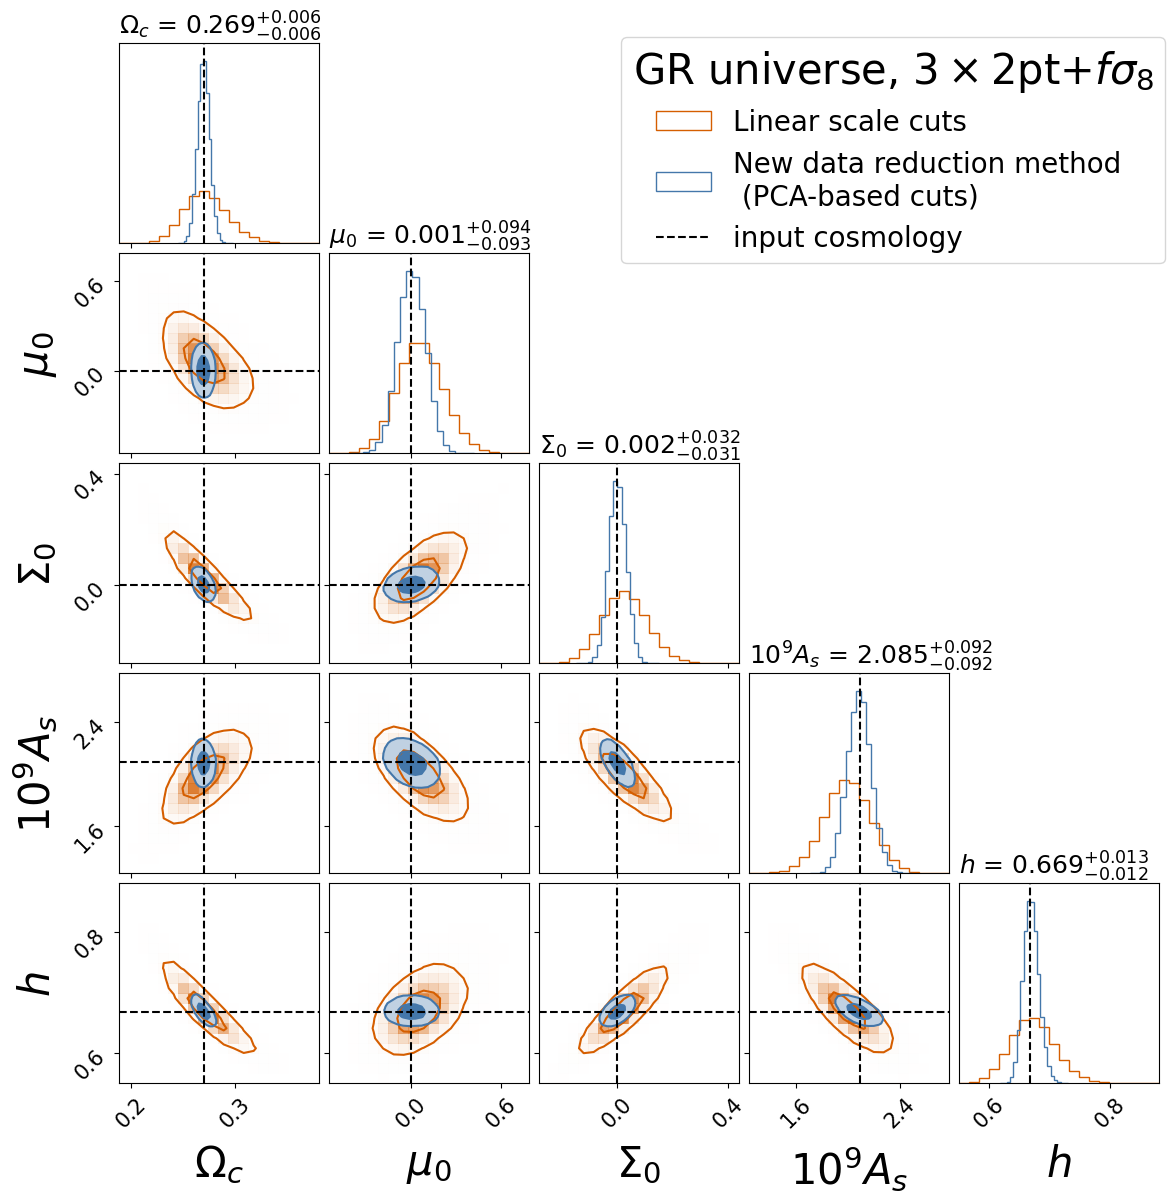

In [440]:
#### STANDARD CUTS #####
print(value1[:ndim])
print(list(max_likelihood_params)[:ndim])
ndim = 5#len(labels)
burned_chain = raw_chain_standardcuts

colors = ["#4477AA",mcolors.to_hex(col[3])]  # Contour colors
truth_color = "k"  # Truth values

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=False,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=False,
    max_n_ticks=2,
    title_fmt=".3f"
)

flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

print(flat_samples.shape)
len_chain_standardcuts = flat_samples.shape[0]

figure = corner.corner(
    flat_samples, **CORNER_KWARGS, labels=labels, color = colors[1],hist_kwargs=dict(density=True)
);

### PCA CUTS####

burned_chain = raw_chain
flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=18, loc="left"),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".3f"
)

print(flat_samples.shape)

corner.corner(
    flat_samples, fig=figure, **CORNER_KWARGS, labels=labels, color=colors[0],hist_kwargs=dict(density=True)
);

######################
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    if value1[i] != None:
        ax = axes[i, i]
        ax.axvline(value1[i], color=truth_color, linestyle="--")

# Loop over histograms
for yi in range(ndim):
    for xi in range(yi):
        if value1[xi] == None:
            ax = axes[yi, xi]
            ax.axhline(value1[yi], color=truth_color, linestyle="--")
        elif value1[yi] == None:
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=truth_color, linestyle="--")
        else:
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=truth_color, linestyle="--")
            ax.axhline(value1[yi], color=truth_color, linestyle="--")
########################

for ax in figure.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)  # Change label size

#plt.legend(["3x2pt, Existing method (linear scale cuts)","maximum likelihood \n (for PCA-based cuts)","3x2pt, Our method (PCA-based cuts)","input cosmology"],\
#           bbox_to_anchor=(1.0, 12.7), fontsize=40,title=r"GR universe",title_fontsize=60)
plt.legend(["Linear scale cuts","New data reduction method \n (PCA-based cuts)","input cosmology"], bbox_to_anchor=(1.1, 5.3), fontsize=20,title=r"GR universe, $3\times2$pt$+f\sigma_8$",title_fontsize=30)
#"maximum likelihood \n (for PCA-based cuts)"
#plt.savefig("/home/c2042999/PCA_project/Figures/Final_figures/3x2pt_fs8_GR_marg.pdf", bbox_inches='tight')


[0.269619, 0.0, 0.0, 2.0919999999999996, 0.6688]
[0.269759873926464, -0.02971027870174031, 0.006415191133844117, 2.0942190038559567, 0.6674032376683322]
(121752, 12)
(1113552, 12)


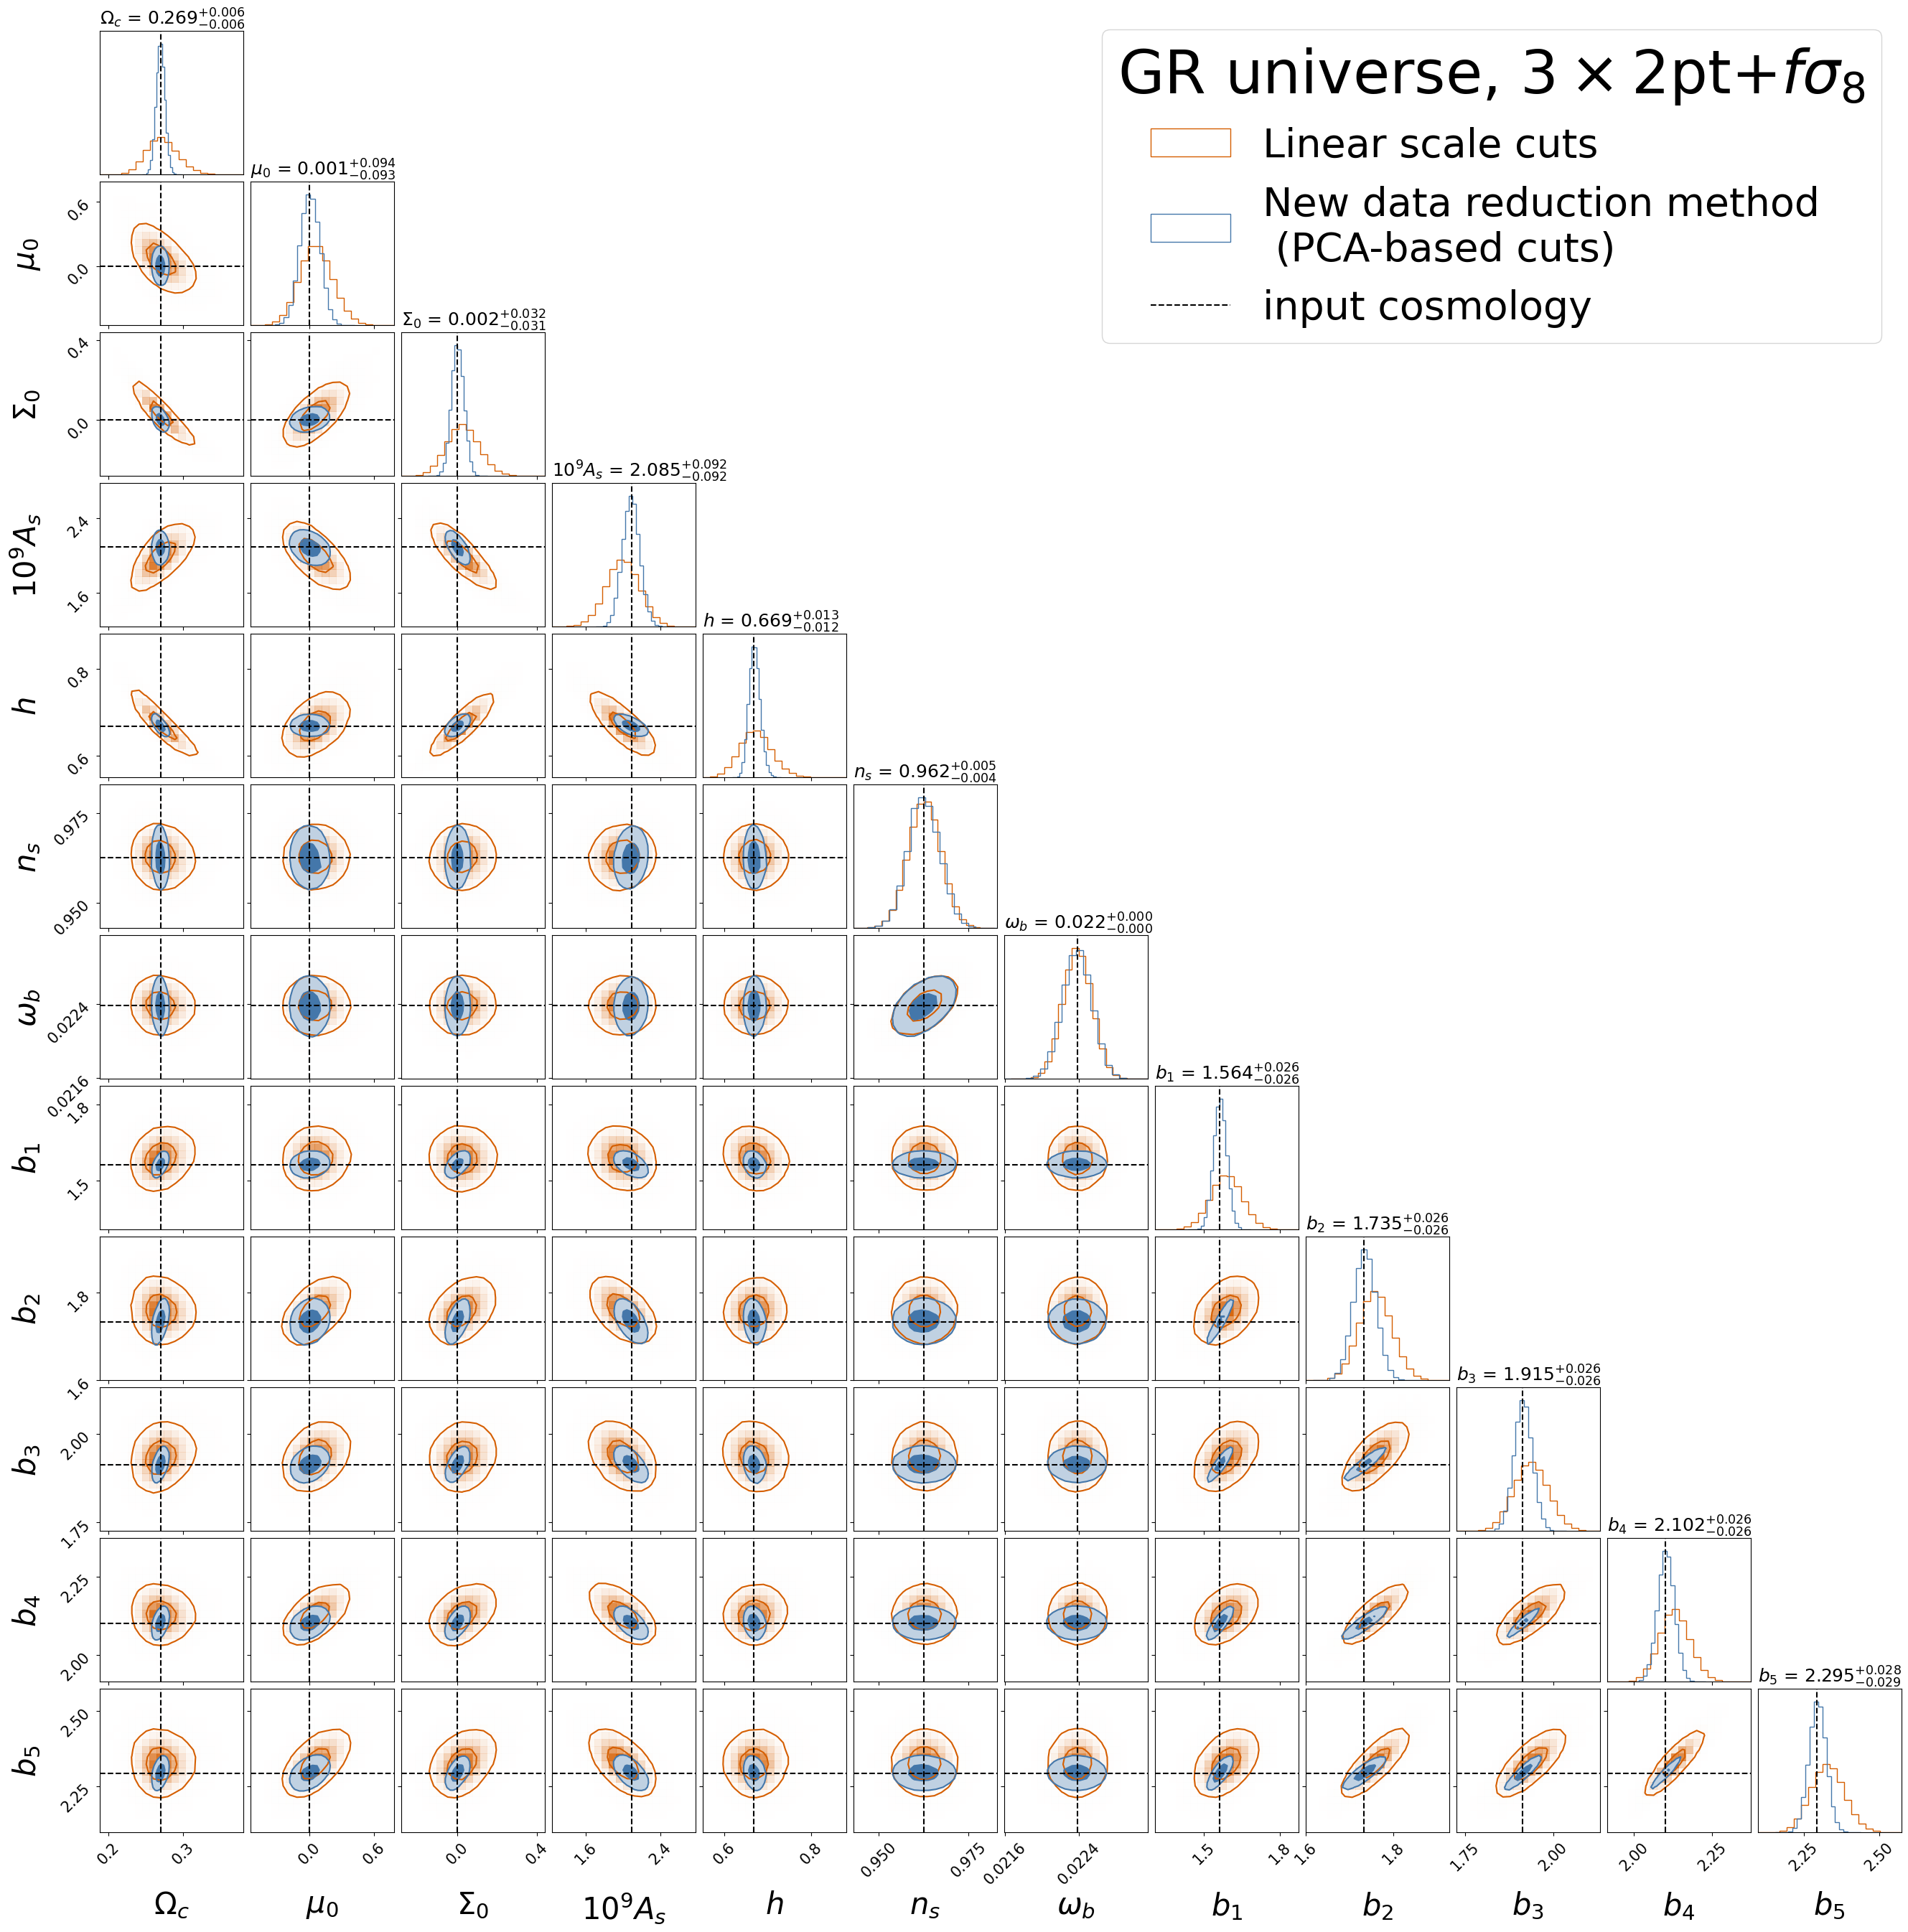

In [441]:
#### STANDARD CUTS #####
print(value1[:ndim])
print(list(max_likelihood_params)[:ndim])
ndim = len(labels)
burned_chain = raw_chain_standardcuts

colors = ["#4477AA",mcolors.to_hex(col[3])]  # Contour colors
truth_color = "k"  # Truth values

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=False,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=False,
    max_n_ticks=2,
    title_fmt=".3f"
)

flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

print(flat_samples.shape)
len_chain_standardcuts = flat_samples.shape[0]

figure = corner.corner(
    flat_samples, **CORNER_KWARGS, labels=labels, color = colors[1],hist_kwargs=dict(density=True)
);

### PCA CUTS####

burned_chain = raw_chain
flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=18, loc="left"),
    show_titles=True,
    smooth = False,
    labelpad = 0.1,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".3f"
)

print(flat_samples.shape)

corner.corner(
    flat_samples, fig=figure, **CORNER_KWARGS, labels=labels, color=colors[0],hist_kwargs=dict(density=True)
);

######################
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    if value1[i] != None:
        ax = axes[i, i]
        ax.axvline(value1[i], color=truth_color, linestyle="--")

# Loop over histograms
for yi in range(ndim):
    for xi in range(yi):
        if value1[xi] == None:
            ax = axes[yi, xi]
            ax.axhline(value1[yi], color=truth_color, linestyle="--")
        elif value1[yi] == None:
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=truth_color, linestyle="--")
        else:
            ax = axes[yi, xi]
            ax.axvline(value1[xi], color=truth_color, linestyle="--")
            ax.axhline(value1[yi], color=truth_color, linestyle="--")
########################
for ax in figure.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=15)  # Change label size
    
plt.legend(["Linear scale cuts","New data reduction method \n (PCA-based cuts)","input cosmology"],\
           bbox_to_anchor=(1.0, 12.7), fontsize=40,title=r"GR universe, $3\times2$pt$+f\sigma_8$",title_fontsize=60)
#plt.legend(["Existing method (linear scale cuts)","Our method (PCA-based cuts)","input cosmology"], bbox_to_anchor=(1.1, 5.3), fontsize=20,title=r"GR universe",title_fontsize=30)
#"maximum likelihood \n (for PCA-based cuts)"
#plt.savefig("/home/c2042999/PCA_project/Figures/Final_figures/3x2pt_fs8_GR.pdf", bbox_inches='tight')


## GR only version

In [284]:
"""Get the GR only version"""

filename = "/scratch/c2042999/chains/mcmc_GR_muSigma_PCACuts.h5"

while True:
    try:
        reader = emcee.backends.HDFBackend(filename, read_only=True)
        break  # Exit the loop once file is read successfully
    except BlockingIOError:
        # Wait for some time before retrying
        print("File is locked, retrying...")
        time.sleep(0.1)  # Sleep for 1 second before trying again

raw_chain_PCAGRonlycuts = reader.get_chain(discard=400, thin=20)#

# Check how many steps have been completed so far
n_steps_completed = reader.iteration
print(f"Number of steps completed: {n_steps_completed}")

# You can also manually access the raw chain and other properties
print(f"Current raw chain shape: {raw_chain_PCAGRonlycuts.shape}")


tau = reader.get_autocorr_time(tol=0)
max_tau_ratio = np.max(tau * 100 / reader.iteration)
converged = max_tau_ratio < 1
print("Current iteration: {}".format(reader.iteration))
print("Max 100 x Tau/N: {}".format(max_tau_ratio))


Number of steps completed: 15007
Current raw chain shape: (730, 76, 12)
Current iteration: 15007
Max 100 x Tau/N: 0.9983779824434879


In [288]:
"""Get the GR only version"""

filename = "/scratch/c2042999/chains/mcmc_ESS_muSigma_PCACuts_GRonly.h5"

while True:
    try:
        reader = emcee.backends.HDFBackend(filename, read_only=True)
        break  # Exit the loop once file is read successfully
    except BlockingIOError:
        # Wait for some time before retrying
        print("File is locked, retrying...")
        time.sleep(0.1)  # Sleep for 1 second before trying again

raw_chain_PCAGRonlycuts = reader.get_chain(discard=400, thin=20)#

# Check how many steps have been completed so far
n_steps_completed = reader.iteration
print(f"Number of steps completed: {n_steps_completed}")

# You can also manually access the raw chain and other properties
print(f"Current raw chain shape: {raw_chain_PCAGRonlycuts.shape}")


tau = reader.get_autocorr_time(tol=0)
max_tau_ratio = np.max(tau * 100 / reader.iteration)
converged = max_tau_ratio < 1
print("Current iteration: {}".format(reader.iteration))
print("Max 100 x Tau/N: {}".format(max_tau_ratio))


Number of steps completed: 14748
Current raw chain shape: (717, 76, 12)
Current iteration: 14748
Max 100 x Tau/N: 0.9965190390233383


(1048040, 5)
(54492, 5)


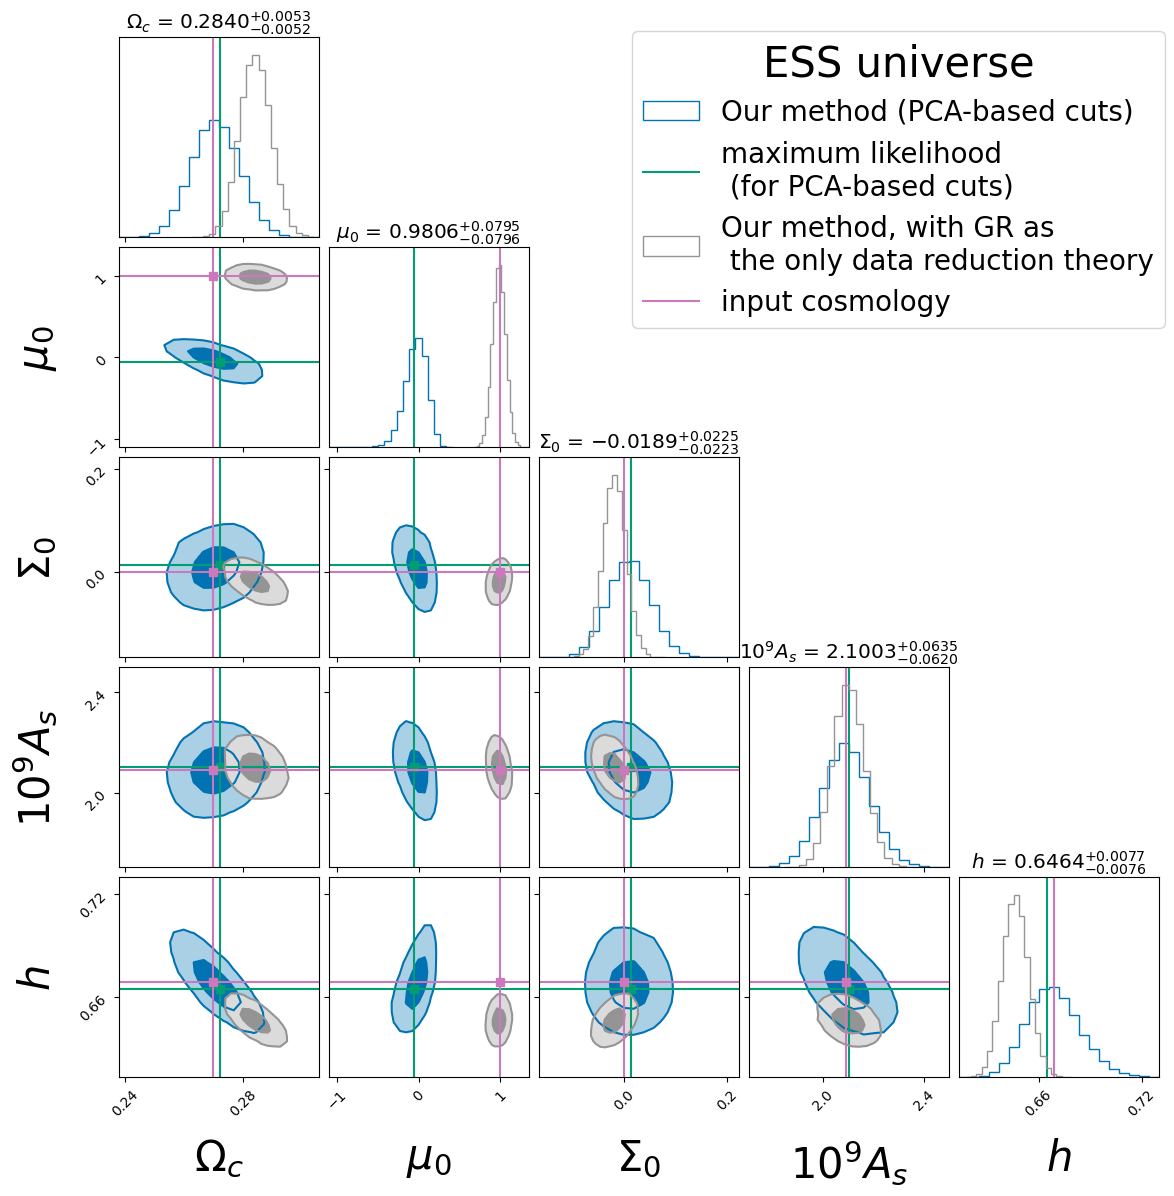

In [289]:
#### STANDARD CUTS #####

ndim = 5#len(labels)
burned_chain = raw_chain_standardcuts
"""

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f",
    truths=max_likelihood_params[:ndim],
    truth_color=mcolors.to_hex(col[2])
)

flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

print(flat_samples.shape)
len_chain_standardcuts = flat_samples.shape[0]

figure = corner.corner(
    flat_samples, **CORNER_KWARGS, labels=labels, color = mcolors.to_hex(col[3]),hist_kwargs=dict(density=True)
);
"""
### PCA CUTS####

burned_chain = raw_chain
flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f",
    truths=max_likelihood_params[:ndim],
    truth_color=mcolors.to_hex(col[2])
)

print(flat_samples.shape)

#corner.corner(
#    flat_samples, fig=figure, **CORNER_KWARGS, labels=labels, color=mcolors.to_hex(col[0]),hist_kwargs=dict(density=True)
#);
figure = corner.corner(
    flat_samples, **CORNER_KWARGS, labels=labels, color=mcolors.to_hex(col[0]),hist_kwargs=dict(density=True)
);

### PCA CUTS - GR ONLY ####

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f",
    truths=value1[:ndim],
    truth_color=mcolors.to_hex(col[4])
)

burnin = 0
burned_chain = raw_chain_PCAGRonlycuts[burnin:, :, :]
flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

print(flat_samples.shape)

corner.corner(
    flat_samples, fig=figure, **CORNER_KWARGS, labels=labels, color=mcolors.to_hex(col[7]),hist_kwargs=dict(density=True)
);

######################
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

#plt.legend(["Existing method (linear scale cuts)","maximum likelihood \n (for PCA-based cuts)","Our method (PCA-based cuts)","Our method, with GR as \n the only data reduction theory","input cosmology"],\
#           bbox_to_anchor=(1.0, 12.7), fontsize=40,title=r"ESS universe",title_fontsize=60)
plt.legend(["Our method (PCA-based cuts)","maximum likelihood \n (for PCA-based cuts)","Our method, with GR as \n the only data reduction theory","input cosmology"], bbox_to_anchor=(1.1, 5.3), fontsize=20,title=r"ESS universe",title_fontsize=30)
#plt.legend(["Existing method (linear scale cuts)","maximum likelihood \n (for PCA-based cuts)","Our method (PCA-based cuts)","Our method, with GR as \n the only data reduction theory","input cosmology"], bbox_to_anchor=(1.1, 5.3), fontsize=20,title=r"ESS universe",title_fontsize=30)

#plt.savefig("/home/c2042999/PCA_project/Figures/Final_figures/3x2pt_fsigma8_ESS_marg_GRonlyPCA_2.pdf", bbox_inches='tight')


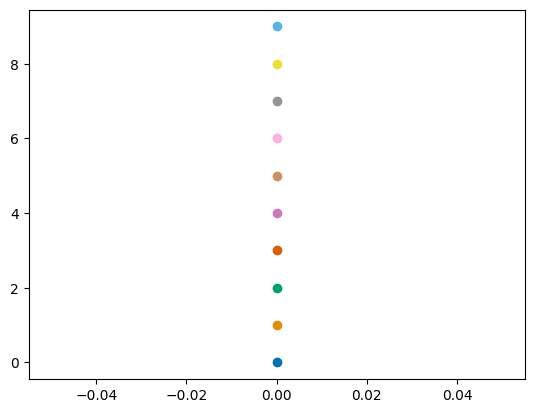

In [127]:

for i in range(10):
    plt.scatter(0,i,color=mcolors.to_hex(col[i]))